## Multi-class Classification and Neural Networks

In this exercise, you will implement one-vs-all logistic regression and neural
networks to recognize hand-written digits.

*Note:
There are 5000 training examples in ex3data1.mat, where each training
example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is
represented by a floating point number indicating the grayscale intensity at
that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional
vector. Each of these training examples becomes a single row in our data
matrix X. This gives us a 5000 by 400 matrix X where every row is a training
example for a handwritten digit image.*

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special,scipy.io
from scipy.optimize import minimize
import matplotlib.cm as cm
import scipy.misc
import random
%matplotlib inline

Data = scipy.io.loadmat('./Files/ex3data1.mat') #This a dictionary

print(Data.keys())

X = Data['X'] #Here each row represents the grayscale value of an image
Y = Data['y'] #Labels

m = Y.size #The no of training samples.

print("X shape is",X.shape)
print("Y shape is",Y.shape)

#Adding the bias unit
X = np.insert(X,0,1,axis=1)

print("New X shape is",X.shape)

weights = scipy.io.loadmat('./Files/ex3weights.mat')
print(weights.keys())

T1 = weights['Theta1']
T2 = weights['Theta2']

print("Theta1 shape: ",T1.shape)
print("Theta2 shape: ",T2.shape)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X shape is (5000, 400)
Y shape is (5000, 1)
New X shape is (5000, 401)
dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])
Theta1 shape:  (25, 401)
Theta2 shape:  (10, 26)


### Visualizing the data:

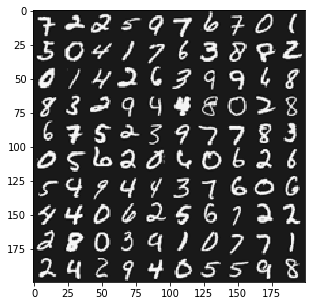

In [17]:
#This code is credited to kaleko 
Index = random.sample(range(X.shape[0]),100)

def Convert_20x20(x):
    """
    Function that is handed a single np array with shape 1x400,
    crates a 20x20 image object from it, and returns it
    """
    width,height = 20,20 #The dimensions of the image
    img = x.reshape(width,height).T
    return img
def Display_Grid(indices_to_display):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width,height = 20,20 #The dimensions of the image
    nrows,ncols = 10,10 #The dimensions of the Image grid
    Grid = np.zeros((nrows*20,ncols*20)) #Each image is 20x20 therefor the Grid dimension is 200x200
    
    
    irow,icol = 0,0 #Index of the images in the Grid
    for index in indices_to_display:
        if(icol==ncols): #Here we are filling the Grid with images row wise 
            irow +=1
            icol  =0
        img = Convert_20x20(X[index,1:])
        Grid[irow*height:irow*height+20,icol*width:icol*width+20] = img
        icol +=1
    
    fig = plt.figure(figsize=(5,5))
    plt.imshow(Grid,cmap = cm.Greys_r)
    
    
    
Display_Grid(Index)

### Sigmoid Fn

In [18]:
def SigmoidFn(Z):
    G = scipy.special.expit(Z)
    return G

### Vectorizing the cost function

In [19]:
def CostFn(theta,x,y):
    h = SigmoidFn(np.dot(x,theta)) #5000x1 matrix
    J = (-1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) #1x1 matrix
    return (J[0])

### Vectorizing the Gradient

In [20]:
def Gradient(theta,x,y):
    h = SigmoidFn(x.dot(theta)).reshape(5000,1)
    grad = (1/m)*x.T.dot(h-y)
    return grad.flatten()

### One vs All Classification

In [21]:
def OneVsAllclass(x,y):
    initial_theta = np.zeros((X.shape[1],1)) #401x1
    Final_theta = np.zeros((10,X.shape[1]))  #10,401
     
    for i in range(1,11):
        res = minimize(CostFn, initial_theta, args=(x,(y == i)*1), method=None,
                       jac=Gradient, options={'maxiter':100})
        Final_theta[i-1] = res.x
    return Final_theta

In [22]:
Theta = OneVsAllclass(X,Y)

### One vs All prediction

In [23]:
def Prediction(theta,x):
    p = SigmoidFn(x.dot(theta.T))
    return np.argmax(p, axis=1)+1            

In [24]:
Acc = Prediction(Theta,X)
print("Taining Accuracy is:",(np.mean(Acc==Y.ravel())*100))

Taining Accuracy is: 94.98


### Neural Network

In [25]:
#Input to 2nd Layer
Hidden_Inputs = np.dot(X,T1.T)  #5000x25
#Adding the bias unit
Hidden_Inputs = np.insert(Hidden_Inputs,0,1,axis=1) #5000x26

#Applying activation function on the 2nd layer inputs
a1 = SigmoidFn(Hidden_Inputs)

#Inputs to the output layer
InOutput = np.dot(a1,T2.T) #

##Applying activation function on the output layer inputs
Output = SigmoidFn(InOutput)
p = np.argmax(Output, axis=1)+1  

print("Taining Accuracy is:",(np.mean(p==Y.ravel())*100))

Taining Accuracy is: 97.52
